# Convolutional Neural Networks - Codealong

## Introduction

In this codealong, we will reinvestigate our previous Santa image classification example. To do this, we will review loading a dataset from a nested directory structure and building a baseline model. From there, we'll build a CNN and demonstrate its improved performance on image recognition tasks. It is recommended you run the cells in order to further explore variables and investigate the code snippets themselves. However, please note that some cells (particularly training cells later on) may take several minutes to run. (On a Macbook pro the entire notebook took ~15 minutes to run.)

## Objectives  

You will be able to:

- Load images from a hierarchical file structure using an image datagenerator 
- Explain why one might augment image data when training a neural network 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 

## Data Exploration

Let's import libraries `os` and `shutil`. They can help us access our underlying file structure.

In [9]:
import os, shutil

Let's see how many images there are in the `santa` directory.

In [10]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'

In [11]:
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

print('There are', len(imgs_santa), 'santa images')

There are 461 santa images


Now, repeat this for the `not_santa` directory: 

In [12]:
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]

print('There are', len(imgs_not_santa), 'images without santa')

There are 461 images without santa


### `split` Folder

In [13]:
train_folder = os.path.join('split', 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join('split', 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join('split', 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')

In [14]:
train_santa

'split/train/santa'

Let's print out how many images we have in each directory in the `split` folder so we know for sure our numbers are right!

In [15]:
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')

There are 271 santa images in the training set


In [16]:
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')

There are 100 santa images in the validation set


In [17]:
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')

There are 90 santa images in the test set


In [18]:
print('There are', len(os.listdir(train_not_santa)), 'images without santa in the train set')

There are 271 images without santa in the train set


In [19]:
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')

There are 100 images without santa in the validation set


In [20]:
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')

There are 90 images without santa in the test set


## Use a densely connected network as a baseline

Now that we've a handle on our data, we can easily use Keras' module with image-processing tools. Let's import the necessary libraries below. 

In [21]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

2024-01-11 12:27:57.103814: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 12:27:57.526006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 12:27:57.526093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 12:27:57.578367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 12:27:57.733613: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 12:27:57.735198: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [22]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 180 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 542 images belonging to 2 classes.


In [23]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [24]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [25]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(200, 12288)


In [26]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [27]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
17/17 [==============================] - 1s 21ms/step - loss: 0.6816 - accuracy: 0.5000 - val_loss: 0.6685 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.5000 - val_loss: 0.6580 - val_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.6559 - accuracy: 0.4982 - val_loss: 0.6700 - val_accuracy: 0.6250
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6408 - accuracy: 0.5590 - val_loss: 0.6716 - val_accuracy: 0.8250
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.5904 - val_loss: 0.6813 - val_accuracy: 0.7700
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.6450 - accuracy: 0.7122 - val_loss: 0.6727 - val_accuracy: 0.6250
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6639 - accuracy: 0.6144 - val_loss: 0.6566 - val_accuracy: 0.8150
Epoch 8/50
17/17 [=

In [29]:
results_train = model.evaluate(train_img, train_y)

17/17 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9631


In [30]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.3745 - accuracy: 0.8722


In [31]:
results_train

[0.1617920696735382, 0.9630996584892273]

In [32]:
results_test

[0.37447798252105713, 0.8722222447395325]

Remember that, in our previous lab on building deeper neural networks from scratch, we obtained a training accuracy of 95%, and a test set accuracy of 74.23%. 

This result is similar to what we got building our manual "deeper" dense model. The results are not entirely different. This is not a surprise!
- Before, we only had a training and a validation set (which was at the same time the test set). Now we have split up the data 3-ways.
- We didn't use minibatches before, yet we used mini-batches of 32 units here.
 
## Build a CNN

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [34]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
17/17 [==============================] - 3s 142ms/step - loss: 0.6847 - acc: 0.5148 - val_loss: 0.6784 - val_acc: 0.5000
Epoch 2/30
17/17 [==============================] - 2s 114ms/step - loss: 0.6774 - acc: 0.5000 - val_loss: 0.6712 - val_acc: 0.5000
Epoch 3/30
17/17 [==============================] - 2s 105ms/step - loss: 0.6708 - acc: 0.5000 - val_loss: 0.6647 - val_acc: 0.5000
Epoch 4/30
17/17 [==============================] - 2s 114ms/step - loss: 0.6643 - acc: 0.5074 - val_loss: 0.6556 - val_acc: 0.5050
Epoch 5/30
17/17 [==============================] - 2s 119ms/step - loss: 0.6552 - acc: 0.5166 - val_loss: 0.6457 - val_acc: 0.5150
Epoch 6/30
17/17 [==============================] - 2s 120ms/step - loss: 0.6446 - acc: 0.5664 - val_loss: 0.6351 - val_acc: 0.5100
Epoch 7/30
17/17 [==============================] - 2s 108ms/step - loss: 0.6342 - acc: 0.5554 - val_loss: 0.6198 - val_acc: 0.6700
Epoch 8/30
17/17 [==============================] - 2s 104ms/step - loss: 0.

In [35]:
results_train = model.evaluate(train_images, train_y)

17/17 [==============================] - 0s 21ms/step - loss: 0.2382 - acc: 0.9133


In [36]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 20ms/step - loss: 0.2912 - acc: 0.8778


In [37]:
results_train

[0.2382170557975769, 0.9132841229438782]

In [38]:
results_test

[0.29115334153175354, 0.8777777552604675]

## Data Augmentation

`ImageDataGenerator()` becomes really useful when we *actually* want to generate more data. We'll show you how this works. 

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

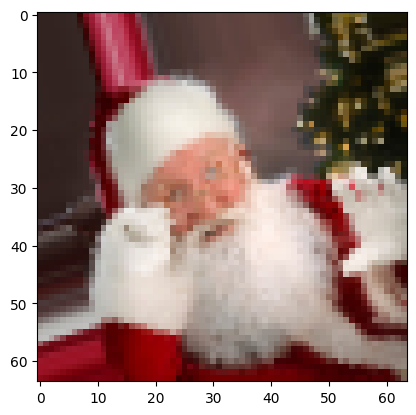

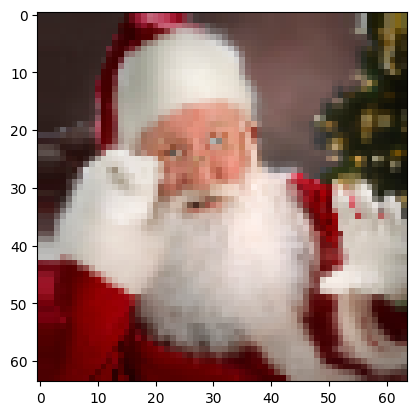

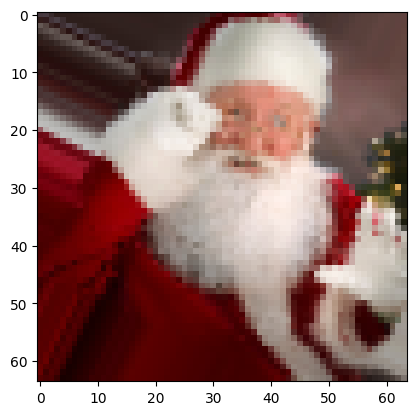

In [40]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [41]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 180 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 542 images belonging to 2 classes.


In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [43]:
history_2 = model.fit(train_generator,
                      epochs=30,
                      validation_data=val_generator)

Epoch 1/30
17/17 [==============================] - 13s 742ms/step - loss: 0.6842 - acc: 0.4815 - val_loss: 0.6757 - val_acc: 0.5000
Epoch 2/30
17/17 [==============================] - 10s 628ms/step - loss: 0.6786 - acc: 0.5000 - val_loss: 0.6694 - val_acc: 0.5000
Epoch 3/30
17/17 [==============================] - 11s 640ms/step - loss: 0.6707 - acc: 0.5037 - val_loss: 0.6635 - val_acc: 0.5000
Epoch 4/30
17/17 [==============================] - 11s 587ms/step - loss: 0.6661 - acc: 0.5000 - val_loss: 0.6548 - val_acc: 0.5050
Epoch 5/30
17/17 [==============================] - 11s 621ms/step - loss: 0.6595 - acc: 0.5148 - val_loss: 0.6462 - val_acc: 0.5200
Epoch 6/30
17/17 [==============================] - 11s 633ms/step - loss: 0.6504 - acc: 0.5369 - val_loss: 0.6355 - val_acc: 0.5300
Epoch 7/30
17/17 [==============================] - 11s 664ms/step - loss: 0.6406 - acc: 0.5590 - val_loss: 0.6219 - val_acc: 0.5750
Epoch 8/30
17/17 [==============================] - 11s 644ms/step - 

In [44]:
test_x, test_y = next(test_generator)

In [45]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 21ms/step - loss: 0.3080 - acc: 0.9111


In [46]:
results_test

[0.30796805024147034, 0.9111111164093018]

## Summary  

In this code along lab, we looked again at some of the preprocessing techniques needed in order to organize our data prior to building a model using Keras. Afterwards, we investigated new code in order to build a CNN for image recognition.